In [1]:
# Recurrent Neural Network
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the training set
dataset_train = pd.read_csv('dataset/dmart_training_set.csv')
dataset_train.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Total Traded Quantity,Turnover,Average Price,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,21-Mar-2017,299.00,600.00,648.90,558.30,647.80,641.60,85728445,5.205259e+10,607.18,997334,25455640,29.69
1,22-Mar-2017,641.60,641.55,657.45,625.10,636.95,638.55,15817671,1.018713e+10,644.03,230754,1980297,12.52
2,23-Mar-2017,638.55,637.90,648.00,628.15,635.00,634.85,4690121,2.998102e+09,639.24,82509,918026,19.57
3,24-Mar-2017,634.85,635.45,640.45,612.60,615.25,616.90,4865013,3.021774e+09,621.12,91530,1091968,22.45
4,27-Mar-2017,616.90,615.00,623.00,602.35,617.05,614.40,3535098,2.167347e+09,613.09,63894,809694,22.90


In [3]:
training_set = dataset_train.iloc[:, 1:13].values

In [4]:
training_set.shape

(388, 12)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 388):
    X_train.append(training_set_scaled[i-60:i, 0:12])
    y_train.append(training_set_scaled[i, 0:12])

In [7]:
#  convert both the feature_set and the labels list to the numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape,y_train.shape

((328, 60, 12), (328, 12))

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 12))
X_train.shape,y_train.shape

((328, 60, 12), (328, 12))

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [10]:
# Initialising the RNN
regressor = Sequential()


In [11]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 12)))


In [12]:
# add a dropout layer to our model. Dropout layer is added to avoid over-fitting, 
regressor.add(Dropout(0.2))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [14]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [15]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [16]:
# Adding the output layer
regressor.add(Dense(units = 12))


In [17]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [18]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/500
328/328 [==============================] - 4s 11ms/step - loss: 0.1497
Epoch 2/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0422
Epoch 3/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0247
Epoch 4/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0204
Epoch 5/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0198
Epoch 6/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0164
Epoch 7/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0152
Epoch 8/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0154
Epoch 9/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0146
Epoch 10/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0147
Epoch 11/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0126


328/328 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 190/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 191/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 192/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 193/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0035
Epoch 194/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 195/500
328/328 [==============================] - 2s 5ms/step - loss: 0.0035
Epoch 196/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 197/500
328/328 [==============================] - 2s 5ms/step - loss: 0.0034
Epoch 198/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 199/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0032A: 1s - loss
Epoch 200/500
328/328 [==============================] - 1s 4ms/step - loss: 0

328/328 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 384/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 385/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 386/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 387/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 388/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 389/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 390/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 391/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 392/500
328/328 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 393/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 394/500
328/328 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 

In [19]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('dataset/dmart_test_set.csv')
real_stock_price = dataset_test.iloc[:, 1:13].values
dataset_test.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Total Traded Quantity,Turnover,Average Price,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,12-Oct-2018,1326.10,1345.0,1421.00,1341.00,1414.9,1411.70,899147,1.246228e+09,1386.01,50111.0,331241,36.84
1,15-Oct-2018,1411.70,1334.8,1359.00,1306.15,1323.7,1329.75,2056672,2.738238e+09,1331.39,122072.0,572830,27.85
2,16-Oct-2018,1329.75,1330.0,1347.95,1325.00,1334.0,1336.95,678083,9.054570e+08,1335.32,38728.0,245508,36.21
3,17-Oct-2018,1336.95,1344.9,1354.00,1300.00,1304.0,1308.65,549534,7.312064e+08,1330.59,26721.0,201754,36.71
4,19-Oct-2018,1308.65,1300.0,1300.30,1226.00,1231.0,1234.25,843104,1.057037e+09,1253.74,59724.0,400381,47.49


In [20]:
dates =  dataset_test.iloc[:, 0].values
dates

array(['12-Oct-2018', '15-Oct-2018', '16-Oct-2018', '17-Oct-2018',
       '19-Oct-2018', '22-Oct-2018', '23-Oct-2018', '24-Oct-2018',
       '25-Oct-2018', '26-Oct-2018', '29-Oct-2018'], dtype=object)

In [21]:
dataset_total = dataset_train.append(other = dataset_test, ignore_index=True, sort=False)
dataset_total = dataset_total.iloc[:, 1:13].values


In [22]:
dataset_total.shape

(399, 12)

In [23]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:]


In [24]:
inputs.shape

(71, 12)

In [25]:
inputs = inputs.reshape(-12,12)
inputs = sc.transform(inputs)

In [26]:
X_test = []
for i in range(60, 71):
    X_test.append(inputs[i-60:i, 0:12])
X_test = np.array(X_test)

In [27]:
X_test.shape

(11, 60, 12)

In [28]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 12))


In [29]:
X_test.shape

(11, 60, 12)

In [30]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(11, 12)

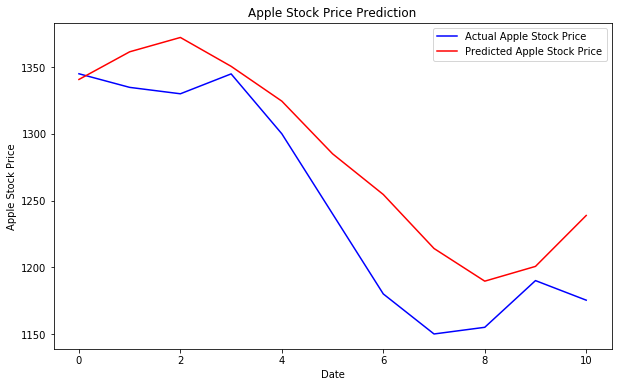

In [31]:
plt.figure(figsize=(10,6))
plt.plot(real_stock_price[:,1], color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price[:,1] , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

